# Машинное обучение
## Задача классификации
Для изучения методов машинного обучения применительно к задаче классификации мной был выбран датасет, содержащий сведения о сотрудниках некоторой компании. Мое исследование посвящено тому, чтобы предсказать, добьется ли работник повышения или нет, а заодно выявить факторы, наиболее влияющие на продвижение по карьерной лестнице. Начнем!

Подключим необходимые для работы библиотеки.

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline              
                                # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

In [2]:
url = "hw1_hr_analysis.csv"
data_raw = pd.read_csv(url)
print("Table size: ", data_raw.shape)
data_raw.head(10)

Table size:  (54808, 14)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


## Данные
 
**employee_id** - идентификатор сотрудника;  
**department** - отдел в компании, где он работает;  
**region** - регион;  
**education** - уровень образования;  
**gender** - пол;  
**recruitment_channel** - канал найма;  
**no_of_trainings** - количество пройденных тренингов;  
**age** - возраст;  
**previous_year_rating** - рейтинг сотрудника за предыдущий год  по пятибальной шкале;  
**length_of_service** - стаж;  
**KPIs_met>80%** - показатель эффективности (0 - меньше 80%, 1 - больше >80%);  
**awards_won?** - вознаграждения (0 - нет, 1 - есть);  
**avg_training_score** - средний балл за пройденные тренинги;  
**is_promoted** - будет ли повышен сотрудник (1 - да, 0 - нет).

Всего имеется 14 признаков, из них количественных - 6, категориальных - 5, бинарных - 3.

In [3]:
data_raw["department"]=data_raw["department"].astype('category')
data_raw["region"]=data_raw["region"].astype('category')
data_raw["education"]=data_raw["education"].astype('category')
data_raw["gender"]=data_raw["gender"].astype('category')
data_raw["recruitment_channel"]=data_raw["recruitment_channel"].astype('category')

data_raw["KPIs_met >80%"]=data_raw["KPIs_met >80%"].astype('bool')
data_raw["awards_won?"]=data_raw["awards_won?"].astype('bool')
data_raw["is_promoted"]=data_raw["is_promoted"].astype('bool')

data_raw.dtypes
#data_raw["department"].dtype, data_raw["region"].dtype, data_raw["education"].dtype, data_raw["gender"].dtype, data_raw["recruitment_channel"].dtype, data_raw["KPIs_met >80%"].dtype, data_raw["awards_won?"].dtype, data_raw["is_promoted"].dtype

employee_id                int64
department              category
region                  category
education               category
gender                  category
recruitment_channel     category
no_of_trainings            int64
age                        int64
previous_year_rating     float64
length_of_service          int64
KPIs_met >80%               bool
awards_won?                 bool
avg_training_score         int64
is_promoted                 bool
dtype: object

Отделим категориальные, бинарные и количественные признаки. Это понадобится нам позже.

In [4]:
categorical_columns = [c for c in data_raw.columns if data_raw[c].dtype.name == 'category']
binary_columns = [c for c in data_raw.columns if data_raw[c].dtype.name == 'bool']
numerical_columns   = [c for c in data_raw.columns if (data_raw[c].dtype.name != 'category') & (data_raw[c].dtype.name != 'bool')]
print(categorical_columns)
print(binary_columns)
print(numerical_columns)

print('\n')
for c in categorical_columns:
    print(c, data_raw[c].unique(), '\n')

['department', 'region', 'education', 'gender', 'recruitment_channel']
['KPIs_met >80%', 'awards_won?', 'is_promoted']
['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']


department ['Sales & Marketing', 'Operations', 'Technology', 'Analytics', 'R&D', 'Procurement', 'Finance', 'HR', 'Legal']
Categories (9, object): ['Analytics', 'Finance', 'HR', 'Legal', ..., 'Procurement', 'R&D', 'Sales & Marketing', 'Technology'] 

region ['region_7', 'region_22', 'region_19', 'region_23', 'region_26', ..., 'region_33', 'region_24', 'region_3', 'region_9', 'region_18']
Length: 34
Categories (34, object): ['region_1', 'region_10', 'region_11', 'region_12', ..., 'region_6', 'region_7', 'region_8', 'region_9'] 

education ['Master's & above', 'Bachelor's', NaN, 'Below Secondary']
Categories (3, object): ['Bachelor's', 'Below Secondary', 'Master's & above'] 

gender ['f', 'm']
Categories (2, object): ['f', 'm'] 

recruitment_channel ['sourcing', 

## Визуализация и описательная статистика

In [5]:
data_raw.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,63.386750
std,22586.581449,0.609264,7.660169,1.259993,4.265094,13.371559
min,1.000000,1.000000,20.000000,1.000000,1.000000,39.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,51.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,60.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,76.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,99.000000


До 75% сотрудников проходят **только один тренинг**, но при этом встречаются выдающиеся личности, проходящие 10 тренингов (в дальнейшей проанализировать на выбросы).  
**Средний возраст** сотрудников фирмы - 35 лет, миниальный - 20 лет, максимальный - 60 лет.  
**Средний стаж** - примерно 6 лет, при этом есть сотрудники, работающие 37 лет.  
**Средний балл** за пройденные тренинги - 63. Минимум - 39, т.к. каждый сотрудник хотя бы раз проходил тренинг, то работники обучаются так, что за один тренинг получают >= 39 баллов. При этом максимальный общий балл - 99.

In [6]:
data_raw.describe(include=['category'])

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


В компании работают сотрудники из 34 регионов, при этом большинство проживают во 2 регионе. Максимальное количество сотрудников в отделе маркетинга, большинство имеют степень бакалавра и являются мужчинами.

In [7]:
data_raw.describe(include=['bool'])

,KPIs_met >80%,awards_won?,is_promoted
count,54808,54808,54808
unique,2,2,2
top,False,False,False
freq,35517,53538,50140


Добиваются продвижения по службе 4668 человек из 54808 сотрудников фирмы, т.е. всего **8,5%**.

Проанализируем **матрицу корреляции** и определим факторы, наиболее влияющие на повышение.

In [8]:
corr = data_raw.corr(numeric_only=True)
corr

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


<AxesSubplot: >

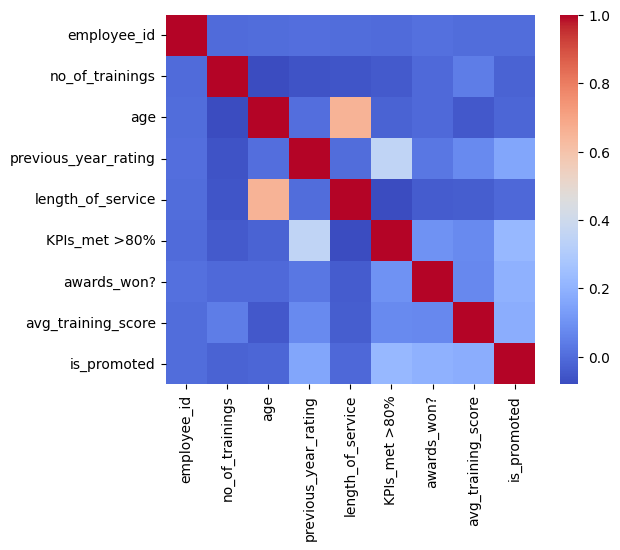

In [9]:
sns.heatmap(corr, square=True, cmap='coolwarm')

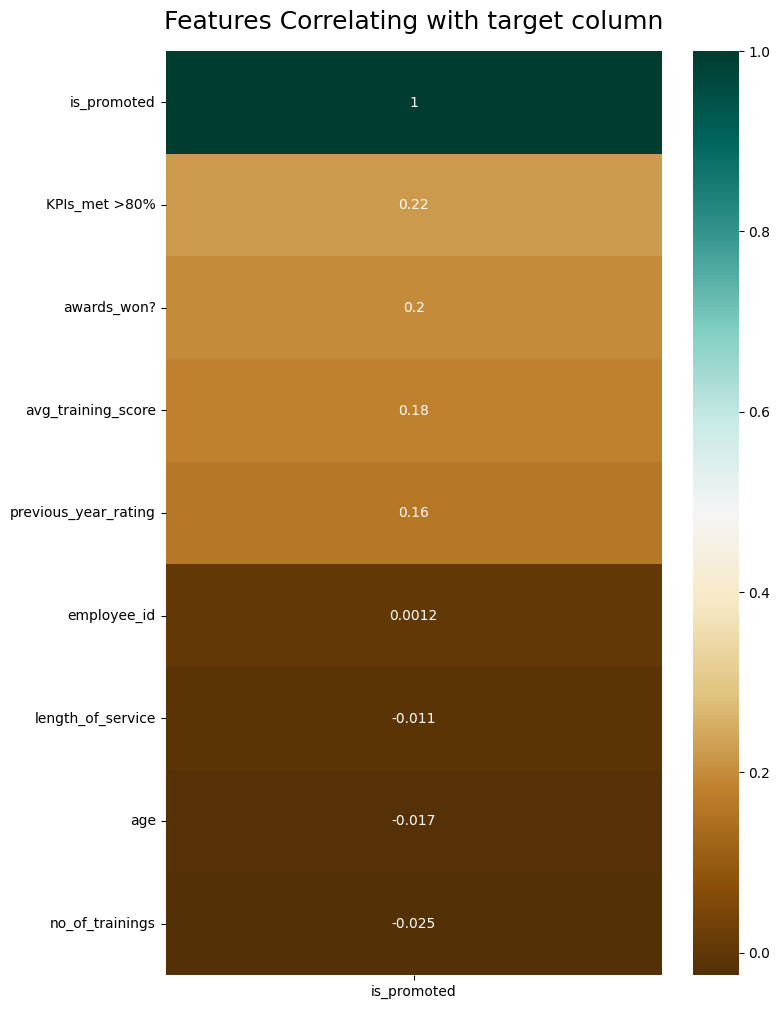

In [10]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data_raw.corr(numeric_only=True)[['is_promoted']].sort_values(by='is_promoted', ascending=False),annot=True, cmap='BrBG')

heatmap.set_title('Features Correlating with target column', fontdict={'fontsize':18}, pad=16);

Видим, что из представленных числовых и бинарных признаков наибольшее влияние на продвижение оказывают рейтинг предыдущего года, коэффициент эффективности, вознаграждения и балл за тренинги. При чем наиболее существенным оказывается показатель эффективности. 

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


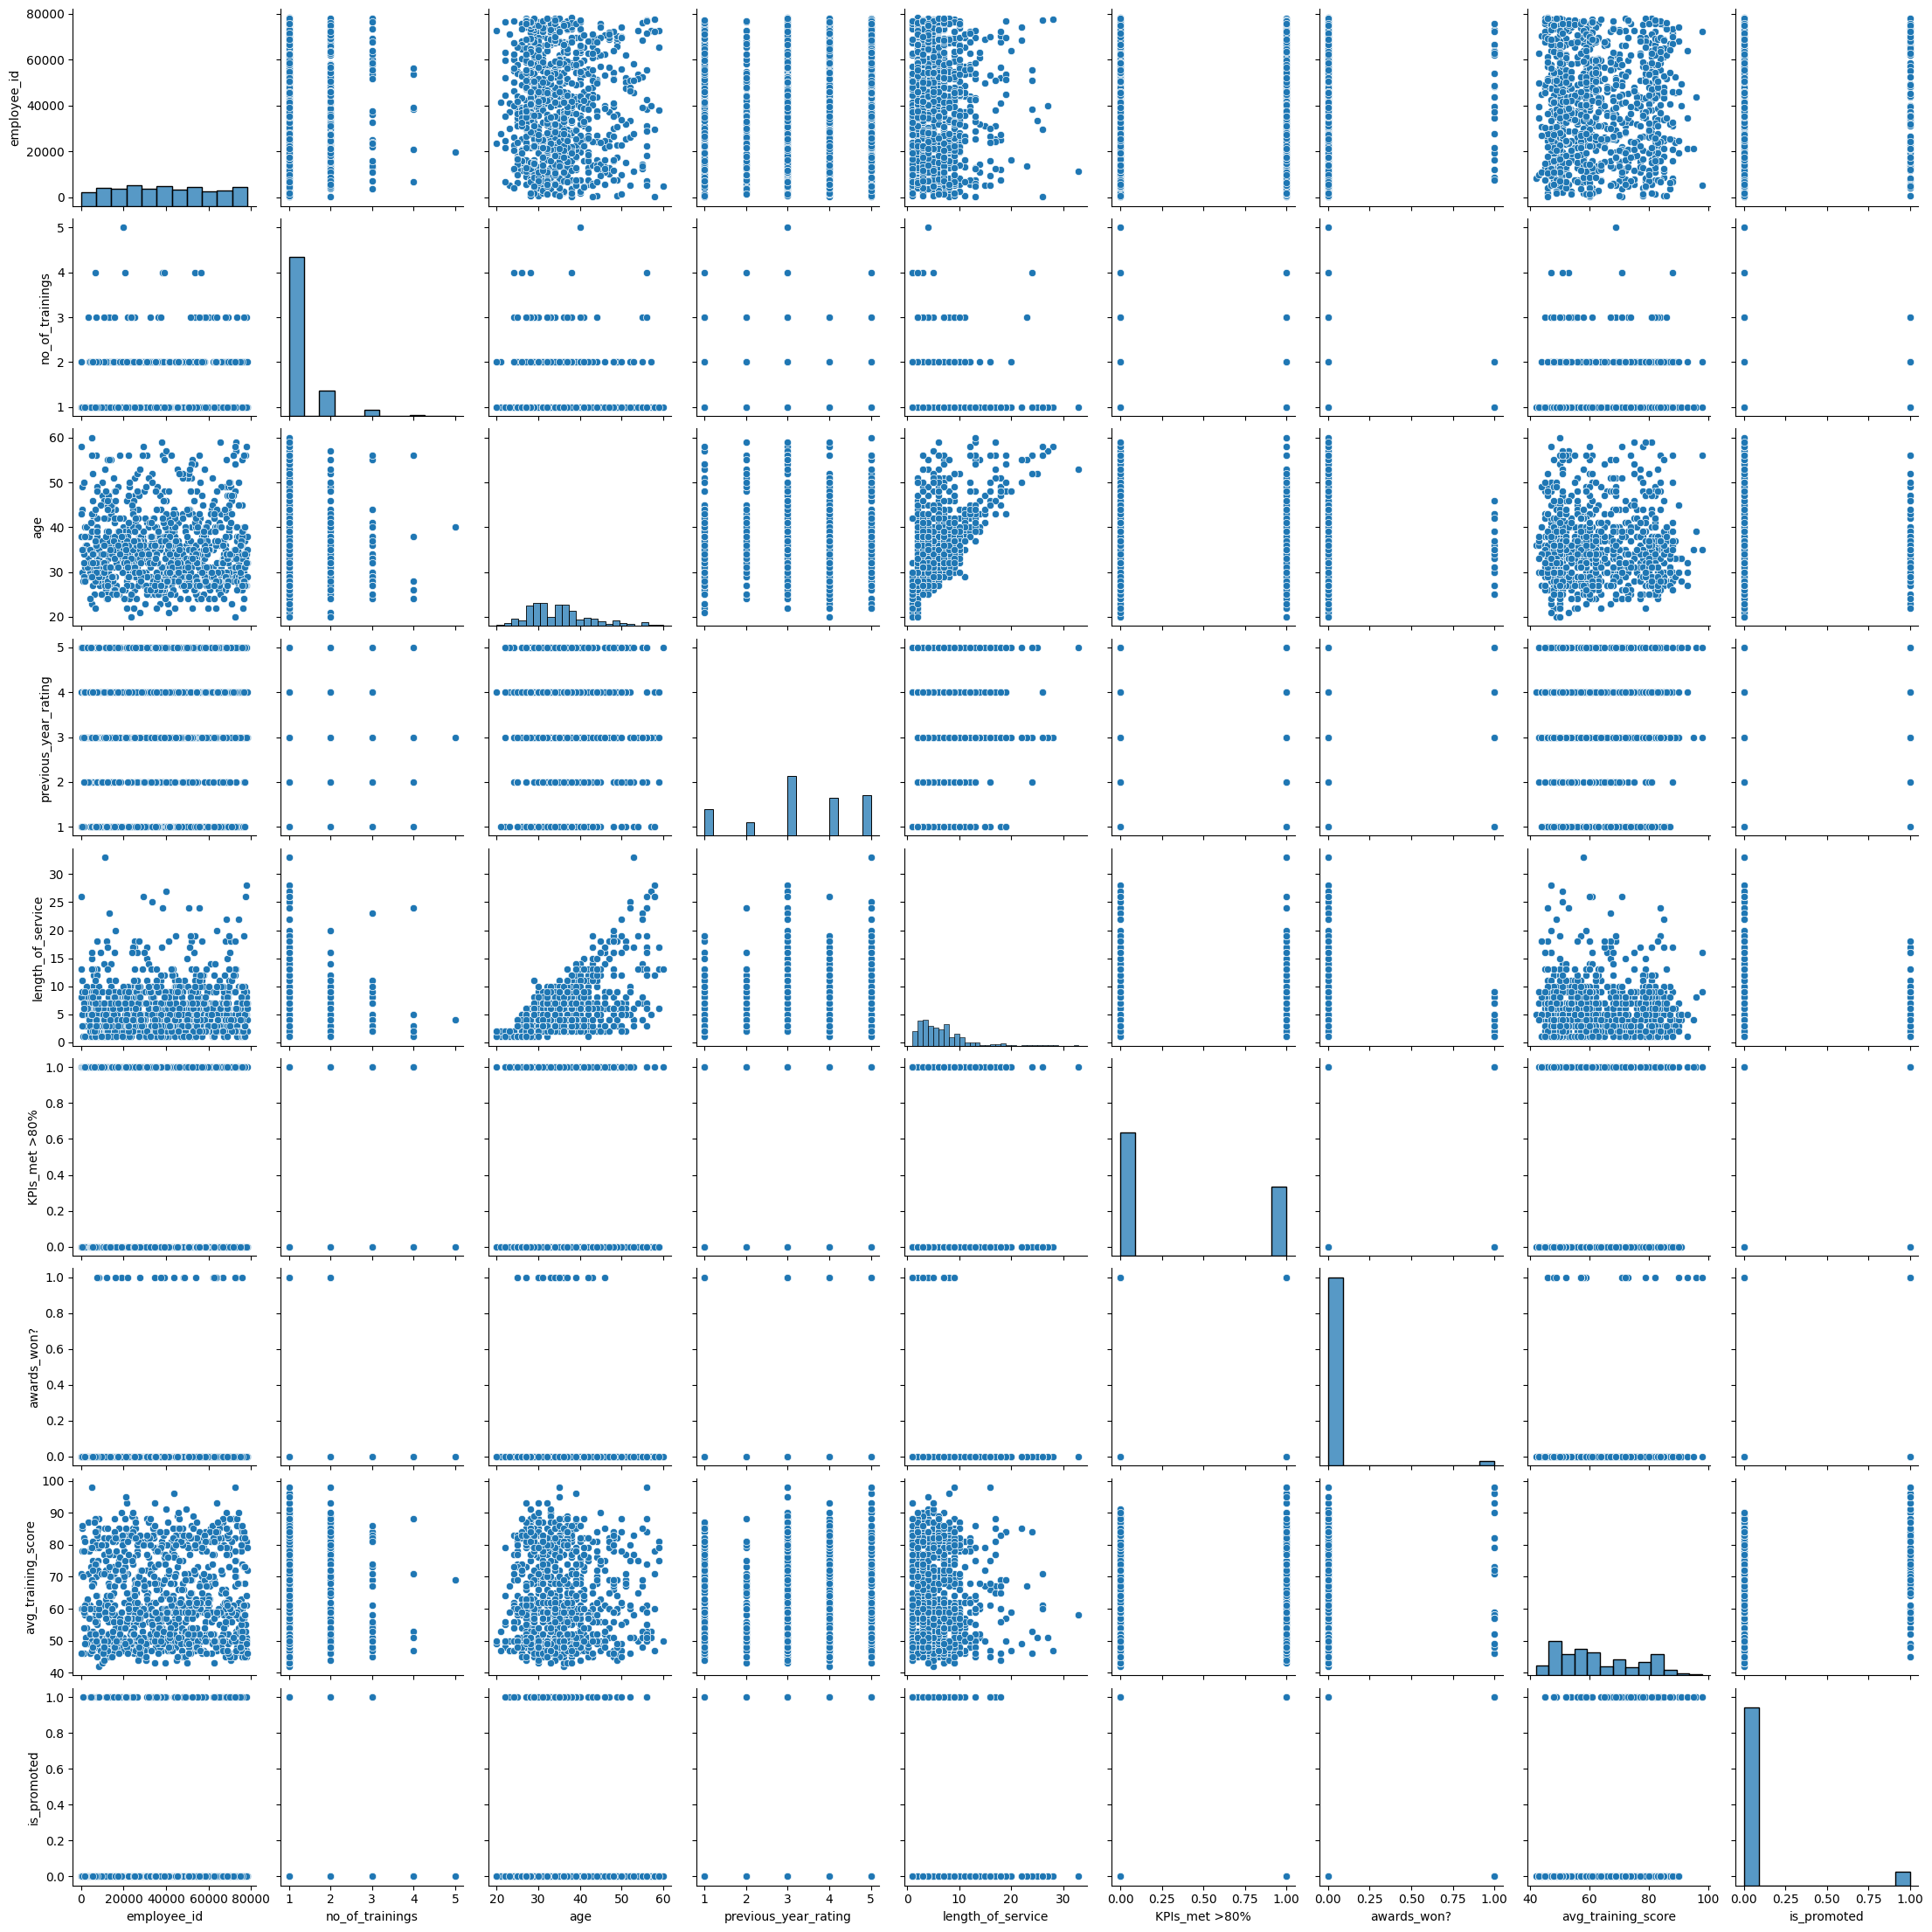

In [11]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)
sns.pairplot(data_raw.iloc[random_subset], diag_kind='hist')
pass

Диаграммы рассеивания позволяют установить связи любых пар признаков. Например, видим, что новички в среднем проходят больше обучений, чем люди с большим стажом, что логично. Также интересная зависимость - компания чаще поощряет людей с небольшим опытом работы.

Рассмотрим также категориальные признаки.

In [12]:
pd.crosstab(data_raw['department'], data_raw['is_promoted'])

is_promoted,False,True
department,,
Analytics,4840,512
Finance,2330,206
HR,2282,136
Legal,986,53
Operations,10325,1023
Procurement,6450,688
R&D,930,69
Sales & Marketing,15627,1213
Technology,6370,768


Видим, что за текущий год больший процент (относительно численности отдела) сотрудников, добившихся повышения, приходится на технологический отдел (Technology) - 10,76%. Затем операционный отдел (Operations) - 9,6% и отдел аналитики (Analytics) - 9,5%.

In [13]:
print("f: ",len(data_raw[data_raw['gender']=='f']))
print("m: ",len(data_raw[data_raw['gender']=='m']))
pd.crosstab(data_raw['gender'], data_raw['is_promoted'])

f:  16312
m:  38496


is_promoted,False,True
gender,,
f,14845,1467
m,35295,3201


Интересно заметить, что процент повышения относительно гендера у женщин больше: 8,9% относительно 8,3% у мужчин.

## Обработка пропущенных значений

In [14]:
data_raw.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

По некоторым сотрудникам отсутствует информация об их образовании и рейтинге предыдущего года. Т.к. один признак категориальный, а другой может принимать дискретные значения, заполним пропущенные значения обоих столбцов модой.

In [15]:
data_raw['education'].fillna(data_raw['education'].mode().iloc[0], inplace=True)
data_raw['previous_year_rating'].fillna(data_raw['previous_year_rating'].mode().iloc[0], inplace=True)
    
data_raw.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [16]:
data_raw.describe() 

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.304481,5.865512,63.386750
std,22586.581449,0.609264,7.660169,1.214770,4.265094,13.371559
min,1.000000,1.000000,20.000000,1.000000,1.000000,39.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,51.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,60.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,76.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,99.000000


Заполнение модой привело к небольшому снижению среднего рейтинга предыдущего года.

## Обработка выбросов

Анализ описательной статистики не выявил существенных выбросов. Единственный признак, требующий дополнительной проверки - число пройденных тренингов. 

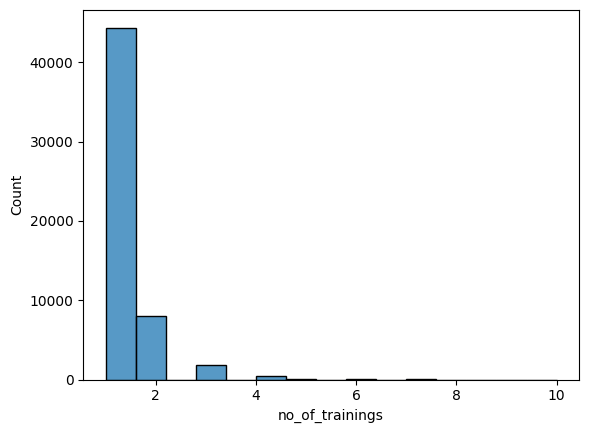

In [17]:
sns.histplot(data_raw['no_of_trainings'], bins = 15)
pass

In [18]:
print('5.0 - ',len(data_raw[data_raw['no_of_trainings']==5.0]))
print('6.0 - ',len(data_raw[data_raw['no_of_trainings']==6.0]))
print('7.0 - ',len(data_raw[data_raw['no_of_trainings']==7.0]))
print('8.0 - ',len(data_raw[data_raw['no_of_trainings']==8.0]))
print('9.0 - ',len(data_raw[data_raw['no_of_trainings']==9.0]))
print('10.0 - ',len(data_raw[data_raw['no_of_trainings']==10.0]))
data_raw['no_of_trainings'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

5.0 -  128
6.0 -  44
7.0 -  12
8.0 -  5
9.0 -  5
10.0 -  5


0.005    1.0
0.010    1.0
0.050    1.0
0.100    1.0
0.500    1.0
0.900    2.0
0.950    2.0
0.990    4.0
0.995    4.0
Name: no_of_trainings, dtype: float64

Видим, что 99,9% значений - от 1 до 4. А, например, от 8 до 10 тренингов в год прошли по 5 человек. В дальнейшем можно будет использовать эту информацию и исключить данные строки из выборки.

## Обработка категориальных признаков

Категориальные признаки с 2 категориями преобразуем к бинарным (закодируем 0 и 1). Для признаков с большим числом категорий применим **векторизацию**. Т.е. вместо признака, принимающего k значений, добавим k признаков по названию категорий, которые будут принимать значения 0 или 1. 

In [19]:
data_raw['gender'] = data_raw['gender'].cat.codes

department_dummies = pd.get_dummies(data_raw['department'])
region_dummies = pd.get_dummies(data_raw['region'])
education_dummies = pd.get_dummies(data_raw['education'])
recruitment_channel_dummies = pd.get_dummies(data_raw['recruitment_channel'])

department_dummies.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1


In [20]:
data = pd.concat((data_raw, department_dummies, region_dummies, education_dummies, recruitment_channel_dummies), axis=1)
data = data.drop(['department', 'education', 'region', 'recruitment_channel'], axis=1)

data.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_6,region_7,region_8,region_9,Bachelor's,Below Secondary,Master's & above,other,referred,sourcing
0,65438,0,1,35,5.0,8,True,False,49,False,...,0,1,0,0,0,0,1,0,0,1
1,65141,1,1,30,5.0,4,False,False,60,False,...,0,0,0,0,1,0,0,1,0,0
2,7513,1,1,34,3.0,7,False,False,50,False,...,0,0,0,0,1,0,0,0,0,1
3,2542,1,2,39,1.0,10,False,False,50,False,...,0,0,0,0,1,0,0,1,0,0
4,48945,1,1,45,3.0,2,False,False,73,False,...,0,0,0,0,1,0,0,1,0,0


## Нормализация признаков  
Исключим влияние масштаба и диапазона данных на целевой признак, для этого нормализуем количественные признаки с помощью **стандартизации**.

In [21]:
data_norm = (data[numerical_columns] - data[numerical_columns].mean(axis = 0))/data[numerical_columns].std(axis = 0)

data_norm

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
0,1.161848,-0.415272,0.025598,1.395753,0.500455,-1.075922
1,1.148698,-0.415272,-0.627129,1.395753,-0.437391,-0.253280
2,-1.402728,-0.415272,-0.104947,-0.250649,0.265994,-1.001136
3,-1.622814,1.226052,0.547780,-1.897052,0.969378,-1.001136
4,0.431635,-0.415272,1.331052,-0.250649,-0.906313,0.718933
...,...,...,...,...,...,...
54803,-1.601209,-0.415272,1.722688,-0.250649,2.610608,1.092861
54804,1.567133,-0.415272,0.286689,-1.073850,0.031532,-0.552422
54805,-1.119153,-0.415272,-1.018765,1.395753,-0.671852,1.167646
54806,-1.132612,-0.415272,-0.757675,-1.897052,-0.906313,-1.375064


In [22]:
data_norm = pd.concat((data_norm, data.drop(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score'], axis=1)), axis=1)

data_norm

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,gender,KPIs_met >80%,awards_won?,is_promoted,...,region_6,region_7,region_8,region_9,Bachelor's,Below Secondary,Master's & above,other,referred,sourcing
0,1.161848,-0.415272,0.025598,1.395753,0.500455,-1.075922,0,True,False,False,...,0,1,0,0,0,0,1,0,0,1
1,1.148698,-0.415272,-0.627129,1.395753,-0.437391,-0.253280,1,False,False,False,...,0,0,0,0,1,0,0,1,0,0
2,-1.402728,-0.415272,-0.104947,-0.250649,0.265994,-1.001136,1,False,False,False,...,0,0,0,0,1,0,0,0,0,1
3,-1.622814,1.226052,0.547780,-1.897052,0.969378,-1.001136,1,False,False,False,...,0,0,0,0,1,0,0,1,0,0
4,0.431635,-0.415272,1.331052,-0.250649,-0.906313,0.718933,1,False,False,False,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,-1.601209,-0.415272,1.722688,-0.250649,2.610608,1.092861,1,False,False,False,...,0,0,0,0,1,0,0,0,0,1
54804,1.567133,-0.415272,0.286689,-1.073850,0.031532,-0.552422,0,False,False,False,...,0,0,0,0,0,0,1,1,0,0
54805,-1.119153,-0.415272,-1.018765,1.395753,-0.671852,1.167646,1,True,False,False,...,0,0,0,0,1,0,0,1,0,0
54806,-1.132612,-0.415272,-0.757675,-1.897052,-0.906313,-1.375064,1,False,False,False,...,0,0,0,1,1,0,0,0,0,1


## Отбор признаков
Исключим из выборки целевой столбец, а также *employee_id*, не влияющий на исход.

In [23]:
X = data_norm.drop(['is_promoted', 'employee_id'], axis=1)
y = data['is_promoted']

print(X.shape)
print(y.shape)

(54808, 57)
(54808,)


Разобьем данные на обучающую и тестовую выборки.

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

41106 13702


## Классификатор ближайших соседей
Обучим модель.

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(4)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
err_train = np.mean(y_train != y_train_pred)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)

0.07414975915924682 0.07889359217632462


Эксперименты с различным числом соседей в классификаторе ближайших соседей показал, что меньшей ошибки получается добиться, используя 4 соседа. При это ошибка на обучающей выборке - 7,4%, на тестовой - 7,9%.

C:\Users\Foxy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


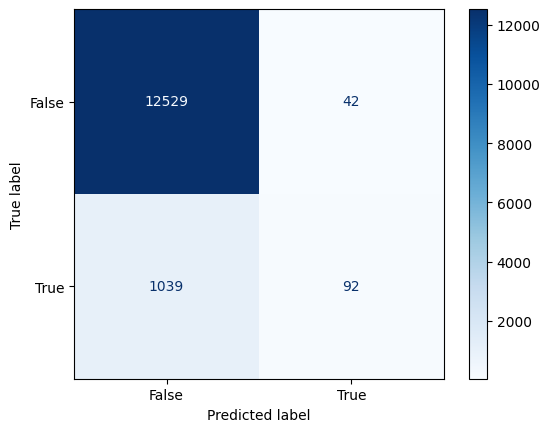

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
pass

## Коррелированные признаки

In [27]:
corr > 0.5

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,True,False,False,False,False,False,False,False,False
no_of_trainings,False,True,False,False,False,False,False,False,False
age,False,False,True,False,True,False,False,False,False
previous_year_rating,False,False,False,True,False,False,False,False,False
length_of_service,False,False,True,False,True,False,False,False,False
KPIs_met >80%,False,False,False,False,False,True,False,False,False
awards_won?,False,False,False,False,False,False,True,False,False
avg_training_score,False,False,False,False,False,False,False,True,False
is_promoted,False,False,False,False,False,False,False,False,True


Видим, что в целом признаки не сильно коррелируют между собой, кроме возраста человека и его стажа. Уберем стаж, т.к. его коэффициент корреляции с целевым признаком меньше. Посмотрим, что получится.

In [28]:
X2 = data_norm.drop(['is_promoted', 'length_of_service', 'employee_id'], axis=1)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.25, random_state = 42)

knn = KNeighborsClassifier(4)
knn.fit(X2_train, y_train)
y_train_pred = knn.predict(X2_train)
y_test_predict = knn.predict(X2_test)
err_train = np.mean(y_train != y_train_pred)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)

0.07303070111419258 0.07765289738724274


Ошибка уменьшилась и на обучающей, и на тестовой выборке, но ненамного (десятые доли процента). 

## Несбалансированность

In [29]:
data_norm['is_promoted'].value_counts()

False    50140
True      4668
Name: is_promoted, dtype: int64

In [30]:
rat = len(data_norm.loc[data_norm['is_promoted']==False])//len(data_norm.loc[data_norm['is_promoted']==True])
rat

10

Видим, что классы не сбалансированы: сотрудников, не добившихся повышения, в 10 раз больше, чем тех, кто его добился. Попробуем сбалансировать классы, воспользовавшись техникой **Upsampling**. Суть этого метода заключается в том, чтобы продублировать меньший класс, сделав соотношение классов примерно равным. 

In [31]:
data_norm_unsamp = data_norm.loc[data_norm['is_promoted']==True]
data_norm_unsamp = data_norm_unsamp.loc[data_norm_unsamp.index.repeat(rat)]
data_norm_unsamp = pd.concat([data_norm.loc[data_norm['is_promoted']==False], data_norm_unsamp]).sample(frac=1)
data_norm_unsamp['is_promoted'].value_counts()

False    50140
True     46680
Name: is_promoted, dtype: int64

In [32]:
X_unsamp = data_norm_unsamp.drop(['is_promoted', 'length_of_service', 'employee_id'], axis=1)
y = data_norm_unsamp['is_promoted']
X_unsamp_train, X_unsamp_test, y_train, y_test = train_test_split(X_unsamp, y, test_size = 0.25, random_state = 42)

knn = KNeighborsClassifier(4)
knn.fit(X_unsamp_train, y_train)
y_train_pred = knn.predict(X_unsamp_train)
y_test_predict = knn.predict(X_unsamp_test)
err_train = np.mean(y_train != y_train_pred)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)

0.03518556772016801 0.06333402189630241


72615 24205


C:\Users\Foxy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


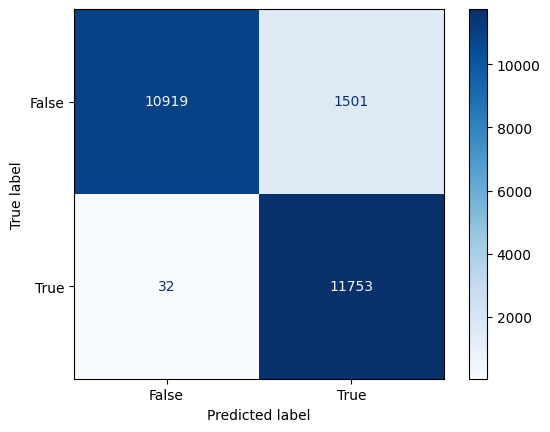

In [33]:
N_train, _ = X_unsamp_train.shape 
N_test,  _ = X_unsamp_test.shape 
print(N_train, N_test)

plot_confusion_matrix(knn, X_unsamp_test, y_test, cmap=plt.cm.Blues)
pass

Видим, что засчет данной техники удалось добиться меньшей ошибки и на обучающей выборке, и на тестовых данных. Кроме того, ошибка второго рода (false negative), наиболее опасная ошибка, стала меньше 1%, но ошибка первого рода (false positive) немного увеличилась (с 3% до 6%).

Таким образом, наилучший результат составляет: 3,5% ошибки на обучающей выборке и 6,3% - на тестовой.